# Implementation of MLP(Multilayer Perceptron)

필요한 파이썬 라이브러리

In [ ]:
import sys # 파이썬 인터프리터가 제공하는 변수와 함수를 직접 제어하게 해줌
import os #환경 변수나 디렉토리, 파일 등의 os 자원을 제어하게 해줌
import numpy as np # 벡터 및 행렬 연산을 위함
import pickle #리스트 클래스 같은 텍스트가 아닌 자료형을 파일로 저장하고 불러오게 해줌
import matplotlib.pyplot as plt # 그래프를 그리기 위함
import urllib.request #URL을 가져오기 위함
import os.path # 코드 내에서 직접 파일 다룰때 유용, 파일/디렉토리 경로 관련 함수 제공
import gzip #파일 압축 및 압축 해제 기능 제공
from inspect import getsourcefile #파이썬 메서드의 소스코드 확인
from os.path import abspath #특정 경로에 대한 절대 경로 얻기 위함

MNIST 데이터 불러오기

In [ ]:
#MNIST 데이터 파일이 있는 사이트에서 파일 다운로드
url_target = 'http://yann.lecun.com/exdb/mnist/'
key_file = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

dataset_dir = os.path.dirname(os.path.abspath(getsourcefile(lambda:0))) #파일 경로 데렉토리 이름 얻기
save_file = dataset_dir + "/mnist.pkl" #MNIST 객체 저장하기 위함

train_num = 60000 #훈련 데이터 갯수
test_num = 10000  #테스트 데이터 개수
img_dim = (1, 28, 28) #1개 이미지 형태
img_size = 784 # 이미지 사이즈

#MNIST 파일 load 하기 위한 함수들

def Download(file_name): # 파일 다운로드 하는 함수
    file_path = dataset_dir + "/" + file_name
    if os.path.exists(file_path):
        return
    urllib.request.urlretrieve(url_target + file_name, file_path) #원하는 파일에 바로 자료 입력
    print(file_name + "다운로드 완료")
    
def Download_mnist(): #MNIST 파일 다운로드
    for v in key_file.values():
       Download(v) #파일 다운로드 하는 함수
        
def Load_label(file_name): #label dataset을 numpy array 형태로 변환
    file_path = dataset_dir + "/" + file_name
    with gzip.open(file_path, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)
    print(file_name + "numpy array로 변환 완료")
    return labels

def Load_img(file_name): #image dataset을 numpy array 형태로 변환
    file_path = dataset_dir + "/" + file_name
    with gzip.open(file_path, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, img_size)
    print(file_name + "numpy array로 변환 완료")
    return data

def Convert_numpy(): #MNIST 데이터셋을 numpy array 형태로 변환
    dataset = {}
    dataset['train_img'] =  Load_img(key_file['train_img'])
    dataset['train_label'] = Load_label(key_file['train_label'])    
    dataset['test_img'] = Load_img(key_file['test_img'])
    dataset['test_label'] = Load_label(key_file['test_label'])
    return dataset

def init_mnist():
    Download_mnist() #MNIST 파일 다운로드
    dataset = Convert_numpy() #numpy array로 변환된 데이터셋 저장
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1)
    print("pickle file 생성 완료")

def Change_one_hot_label(X): #X를 one-hot 배열 T로 변경시킴
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T): #X 값에 해당하는 T 인덱스 숫자만 1로 변경
        row[X[idx]] = 1
    return T
    
def Load_mnist(normalize=True, flatten=True, one_hot_label=False): # MNIST 데이터셋 읽기 
                                                                   #(훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
   
    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    if normalize: #이미지의 픽셀 값을 0 ~ 1 사이의 값으로 정규화할지 결정
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:  #one_hot_label이 True이면 레이블을 one-hot 배열로 돌려줌
        dataset['train_label'] = Change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = Change_one_hot_label(dataset['test_label'])    
    
    if not flatten:  #입력 이미지를 1차원 배열로 만들지 결정
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


if __name__ == '__main__':
    init_mnist()

train-images-idx3-ubyte.gz다운로드 완료
train-labels-idx1-ubyte.gz다운로드 완료
t10k-images-idx3-ubyte.gz다운로드 완료
t10k-labels-idx1-ubyte.gz다운로드 완료
train-images-idx3-ubyte.gznumpy array로 변환 완료
train-labels-idx1-ubyte.gznumpy array로 변환 완료
t10k-images-idx3-ubyte.gznumpy array로 변환 완료
t10k-labels-idx1-ubyte.gznumpy array로 변환 완료
pickle file 생성 완료


In [ ]:
# 데이터 읽기
(X_train, Y_train), (X_test, Y_test) = Load_mnist(normalize=True, one_hot_label=True)

print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(X_test))
print(np.shape(Y_test))

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


Show random 3 images per each class

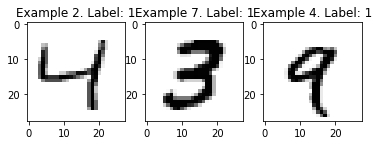

In [ ]:
#Problem 1-(a)
#Show random 3 images per each class

def display_image(position): #이미지 위치를 입력하면 해당 위치의 MNIST 이미지를 보여주는 함수
    
    image = X_train.reshape(60000, 28, 28, 1)[position].squeeze() #이미지 출력을 위해 28x28x1 크기로 다시 변환
    plt.title('Example %d. Label: %d' % (position, max(Y_train[position])))
    plt.imshow(image, cmap=plt.cm.gray_r)

#subplot 함수를 활용해 세가지 숫자 이미지를 출력
plt.subplot(1, 3, 1) 
display_image(2)
plt.subplot(1, 3, 2)
display_image(7)
plt.subplot(1, 3, 3)
display_image(4)

# Implement a MLP architecture and write forward pass

*   항목 추가
*   항목 추가



ReLU & Softmax 함수 구현

In [ ]:
#ReLU 함수 구현
def relu(x: np.array):  
    return np.maximum(0, x) #x값이 0보다 크면 x값 반환
                            #x값이 0보다 작으면 0 반환

#Softmax 함수 구현
def softmax(x):
    if x.ndim == 2:  #x가 2차원 일때 
        x = x.T  #Transpose
        x = x - np.max(x, axis=0) # 오버플로 방지
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 방지
    return np.exp(x) / np.sum(np.exp(x))


Cross-Entropy Loss 함수

In [ ]:
#Cross_entropy loss 함수
def cross_entropy_loss(y, t):
    if y.ndim == 1: #y가 1차원 일때 reshape
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size 

ReLU, Affine, Softmax Loss 계층

In [ ]:
# Relu 계층
class Relu:
    def __init__(self): #초기화
        self.mask = None

    def forward(self, x): #forward pass 구현
        self.mask = (x <= 0)  
        out = x.copy()
        out[self.mask] = 0 #x가 0보다 작으면 0으로 출력

        return out

    def backward(self, dout): #backward pass 구현
        dout[self.mask] = 0
        dx = dout

        return dx

# Affine 계층: 행렬 곱 연산 
class Affine:
    def __init__(self, W, b): #초기화
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x): #forward pass 구현
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b  # XW+b 연산 수행

        return out

    def backward(self, dout): #backward pass 구현, gradient 계산에 활용
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경
        return dx

# Softmax-with-Loss 계층 
class SoftmaxWithLoss:
    def __init__(self):  # 초기화
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t): #forward pass 구현
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_loss(self.y, self.t)  #softmax 결과 y와 정답 t 사이 loss 값 구함
        
        return self.loss

    def backward(self, dout=1): #backward pass 구현, gradient 계산에 활용
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

MLP architecture 구현

In [ ]:
from collections import OrderedDict #OrderedDict: 순서가 있는 딕셔너리 객체, 딕셔너리에 추가한 순서를 기억,
                                    #이를 활용해 순전파 시 호출한 레이어 순서를 역전파시 뒤바꾸어서 호출 가능

class MLP_architecture:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 3층 신경망의 파라미터 딕셔너리
        self.params = {}
        self.params['W1'] = np.random.randn(input_size, hidden_size) * weight_init_std 
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.randn(hidden_size, hidden_size) * weight_init_std 
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = np.random.randn(hidden_size, output_size) * weight_init_std 
        self.params['b3'] = np.zeros(output_size)
        
        # 3층 신경망의 계층 생성
        self.layers = OrderedDict()
        #Layer 1: Flatten layer 기능은 데이터 불러올때 수행함

        #Layer 2: Dense layer followed by ReLU activation function
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1']) 
        self.layers['Relu1'] = Relu()

        #Layer 3: Dense layer followed by ReLU activation function
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()

        #Layer 4: Output dense layer with softmax outputs
        self.layers['Affine3'] = Affine(self.params['W3'], self.params['b3'])
        self.lastlayer = SoftmaxWithLoss() 
        
    def predict(self, x): #입력 x가 들어왔을 때 y값 예측 시 활용
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):  # Loss 함수, x : 입력 데이터, t : 정답 레이블
        y = self.predict(x)
        loss = self.lastlayer.forward(y, t) #Softmax 통과 후 loss 값 계산 
        return loss
    
    def accuracy(self, x, t): #Train, Test 정확도 계산 시 활용
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1: t = np.argmax(t, axis=1)
        
        acc = np.sum(y == t) / float(y.shape[0])
        return acc 
    
    def gradient(self, x, t): # gradient 계산 
        # 순전파 수행
        self.loss(x, t)
        
        # 역전파 수행 - 1.Softmax-with-Loss 계층 (마지막 계층)
        dout = 1
        dout = self.lastlayer.backward(dout)
        
        # 역전파 수행 - 2.나머지 계층
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        # 역전파 수행한 결과의 파라미터 변화량 보관
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        grads['W3'] = self.layers['Affine3'].dW
        grads['b3'] = self.layers['Affine3'].db
        
        return grads

  # 수치미분으로 기울기 계산(for 오차역전파 기울기 검증 목적)
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient_func(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient_func(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient_func(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient_func(loss_W, self.params['b2'])
        grads['W3'] = numerical_gradient_func(loss_W, self.params['W3'])
        grads['b3'] = numerical_gradient_func(loss_W, self.params['b3'])
        
        return grads

#Implement backward pass to compute the gradients w.r.t the parameters
Check the correctness of my implementation by using finite difference: W, b 값들이 0에 가까우면 성공

수치 미분 계산 함수 - 검증용

In [ ]:
#Using finite difference: 함숫값의 차를 이용해 미분계수를 근사하는 방법

def numerical_gradient_func(f, x): #finite difference 수식 구현
    h = 1e-4 
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [ ]:
#MLP architecture 실행
MLP = MLP_architecture(input_size=28*28, hidden_size=128, output_size=10)


X_batch = X_train.reshape(60000, 28, 28, 1)[:3]
Y_batch = Y_train[:3]

grad_numerical = MLP.numerical_gradient(X_batch, Y_batch)
grad_backprop = MLP.gradient(X_batch, Y_batch)

# 각 가중치의 절대 오차의 평균을 구함
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:3.073111453990192e-11
b1:1.886904624111046e-10
W2:2.4192992244085333e-08
b2:1.8052380673195127e-05
W3:3.5378168942459246e-10
b3:1.3989565225830392e-07


# Implement a stochastic gradient descent (SGD) algorithm and train the model
MLP network를 활용해 MNIST 데이터 학습
- training and validation loss curves in a single plot

In [ ]:
MLP = MLP_architecture(input_size=28*28, hidden_size=128, output_size=10)

steps = 10       #학습 반복 횟수
train_size = X_train.shape[0] #train size
batch_size= 1     #batch 크기만큼 연산 후 파라미터 업데이트
learning_rate = 0.01

train_loss = []      #train 시 계산되는 loss 값 저장, 추후 그래프 그리는데 활용
validation_loss = [] #validation 시 계산되는 loss 값 저장, 추후 그래프 그리는데 활용
train_accuracy = []       #train 과정의 정확도 측정 값 저장
test_accuracy = []        #test 과정의 정확도 측정 값 저장

# Mini-batch로 학습: Stochastic Gradient Descent를 위해 batch_size = 1로 설정
for step in range(steps):

  if step == 0: #학습 전 accuracy 계산 및 loss 값 저장
      acc_train = MLP.accuracy(X_train, Y_train) #train accuracy 계산
      acc_test = MLP.accuracy(X_test, Y_test)   #test accuracy 계산
      train_accuracy.append(acc_train)
      test_accuracy.append(acc_test)

      #Accuracy 출력
      print(f'{step}번째 학습 후 Train Accuracy:', round(acc_train, 3)*100, '%')  
      print(f'{step}번째 학습 후 Test Accuracy:', round(acc_test, 3)*100, '%')
      print()

      loss_t = MLP.loss(X_train, Y_train)  # train loss 계산
      train_loss.append(loss_t)            # 계산되는 loss 값을 train_loss에 저장
      
      loss_v = MLP.loss(X_test, Y_test)    # validation loss 계산
      validation_loss.append(loss_v)       # 계산되는 loss 값을 validation_loss에 저장

  for i in range(train_size):
    #mini-batch 구현
    batch_mask = np.random.choice(train_size, batch_size) #임의 표본 추출
    X_batch = X_train[batch_mask]  #batch size 만큼 학습
    Y_batch = Y_train[batch_mask]  #batch size 만큼 학습
    
    # 오차역전파로 학습 수행
    grads = MLP.gradient(X_batch, Y_batch)
    
    # Stochastic Gradient Descent 알고리즘으로 경사하강법 수행
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        MLP.params[key] -= learning_rate * grads[key]
    
  # SGD로 파라미터 갱신 후 다시 Loss값 얻기
  loss_t = MLP.loss(X_train, Y_train)  # train loss 계산
  train_loss.append(loss_t)            # 계산되는 loss 값을 train_loss에 저장
  
  # 검증 데이터로 loss 값 계산
  loss_v = MLP.loss(X_test, Y_test)    # validation loss 계산
  validation_loss.append(loss_v)       # 계산되는 loss 값을 validation_loss에 저장

  # 100번 간격으로 성능 체크
  if step % 1 == 0:
      acc_train = MLP.accuracy(X_train, Y_train) #train accuracy 계산
      acc_test = MLP.accuracy(X_test, Y_test)   #test accuracy 계산
      train_accuracy.append(acc_train)
      test_accuracy.append(acc_test)

      #Accuracy 출력
      print(f'{step+1}번째 학습 후 Train Accuracy:', round(acc_train, 3)*100, '%')  
      print(f'{step+1}번째 학습 후 Test Accuracy:', round(acc_test, 3)*100, '%')
      print()

0번째 학습 후 Train Accuracy: 10.299999999999999 %
0번째 학습 후 Test Accuracy: 11.3 %

1번째 학습 후 Train Accuracy: 96.5 %
1번째 학습 후 Test Accuracy: 96.0 %

2번째 학습 후 Train Accuracy: 97.89999999999999 %
2번째 학습 후 Test Accuracy: 97.1 %

3번째 학습 후 Train Accuracy: 98.1 %
3번째 학습 후 Test Accuracy: 97.0 %

4번째 학습 후 Train Accuracy: 98.4 %
4번째 학습 후 Test Accuracy: 97.1 %

5번째 학습 후 Train Accuracy: 98.6 %
5번째 학습 후 Test Accuracy: 97.5 %

6번째 학습 후 Train Accuracy: 99.0 %
6번째 학습 후 Test Accuracy: 97.6 %

7번째 학습 후 Train Accuracy: 99.1 %
7번째 학습 후 Test Accuracy: 97.7 %

8번째 학습 후 Train Accuracy: 99.2 %
8번째 학습 후 Test Accuracy: 97.8 %

9번째 학습 후 Train Accuracy: 98.9 %
9번째 학습 후 Test Accuracy: 97.5 %

10번째 학습 후 Train Accuracy: 99.3 %
10번째 학습 후 Test Accuracy: 97.89999999999999 %



Problem 1-(d) 결과 그래프

Text(0, 0.5, 'loss values')

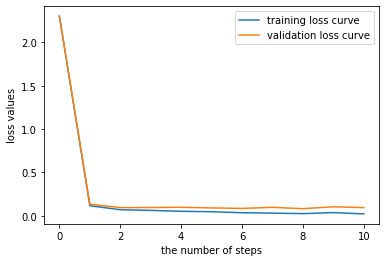

In [ ]:
x_axis = np.array(range(steps+1))  #x축: step 갯수(반복 횟수)

plt.plot(x_axis, train_loss, x_axis, validation_loss) #training, validation loss curve 출력

plt.legend(('training loss curve','validation loss curve'))
plt.xlabel('the number of steps')
plt.ylabel('loss values')


#Train with different hyperparameters

In [ ]:
MLP = MLP_architecture(input_size=28*28, hidden_size=128, output_size=10)

steps = 1001     #학습 반복 횟수
train_size = X_train.shape[0] #train size

#6 종류의 batch size, learning rate 조합으로 그래프 출력하기 위함
batch_size= [100, 200]        # batch size 종류 2개 지정
learning_rate = [0.01, 0.1, 1] # learning rate 종류 3개 지정

train_loss_arr = np.zeros((6, 1001))       #train loss 값 저장, 6종류의 그래프 출력하기 위함
validation_loss_arr = np.zeros((6, 1001))  #validation loss 값 저장, 6종류의 그래프 출력하기 위함

iter = 0  #반복하는 횟수 저장

for bs in range(len(batch_size)):
  for ir in range(len(learning_rate)):
    
    # Mini-batch로 학습
    for step in range(steps):

      #mini-batch 구현
      batch_mask = np.random.choice(train_size, batch_size[bs]) #임의 표본 추출
      X_batch = X_train[batch_mask] #batch size 만큼 학습
      Y_batch = Y_train[batch_mask] #batch size 만큼 학습
      
      # 오차역전파로 학습 수행
      grads = MLP.gradient(X_batch, Y_batch)
      
      # 경사하강법 수행
      for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
          MLP.params[key] -= learning_rate[ir] * grads[key]
      
      # GD로 파라미터 갱신 후 다시 Loss값 얻기
      loss_t = MLP.loss(X_batch, Y_batch) # train loss 계산
      train_loss_arr[iter][step] = loss_t # 계산되는 loss 값을 train_loss에 저장
      
      # 검증 데이터를 사용해 정확도 측정
      loss_v = MLP.loss(X_test, Y_test)        # validation loss 계산
      validation_loss_arr[iter][step] = loss_v # 계산되는 loss 값을 validation_loss에 저장

    iter = iter + 1 # 반복 횟수 업데이트

Problem 1-(e) 결과 그래프

Text(0, 0.5, 'loss')

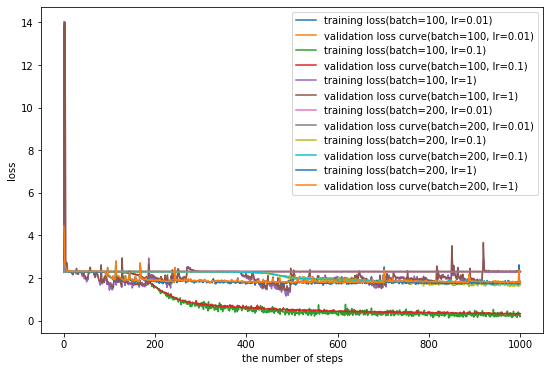

In [ ]:
x_axis = np.array(range(steps)) #x축: step 갯수(반복 횟수)
plt.figure(figsize=(9, 6)) #그래프 출력 창 크기 조절

plt.plot(x_axis, train_loss_arr[0], label='training loss(batch=100, lr=0.01)')
plt.plot(x_axis, validation_loss_arr[0], label='validation loss curve(batch=100, lr=0.01)')

plt.plot(x_axis, train_loss_arr[1], label='training loss(batch=100, lr=0.1)')
plt.plot(x_axis, validation_loss_arr[1], label='validation loss curve(batch=100, lr=0.1)')

plt.plot(x_axis, train_loss_arr[2], label='training loss(batch=100, lr=1)')
plt.plot(x_axis, validation_loss_arr[2], label='validation loss curve(batch=100, lr=1)')

plt.plot(x_axis, train_loss_arr[3], label='training loss(batch=200, lr=0.01)')
plt.plot(x_axis, validation_loss_arr[3], label='validation loss curve(batch=200, lr=0.01)')

plt.plot(x_axis, train_loss_arr[4], label='training loss(batch=200, lr=0.1)')
plt.plot(x_axis, validation_loss_arr[4], label='validation loss curve(batch=200, lr=0.1)')

plt.plot(x_axis, train_loss_arr[5], label='training loss(batch=200, lr=1)')
plt.plot(x_axis, validation_loss_arr[5], label='validation loss curve(batch=200, lr=1)')

plt.legend()
plt.xlabel('the number of steps')
plt.ylabel('loss')